### Agriculture and Development: Data Reading and Analysis

##### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Routes

In [93]:
routes = {
    'data': '../data/',
    'files': {
        'Agricultural Share of GDP': 'agriculture_share_gdp/values.csv',
        'GDP per capita': 'gdp_pc/values.csv',
        'GDP per capita PPP (2017)': 'gdp_pc_ppp/values.csv'
    }
}

In [6]:
def get_route(filename):
    if filename in routes['files'].keys():
        route = routes['data']+routes['files'][filename]
        return route
    else:
        return np.nan

##### Base Reading

1. Agriculture, forestry, and fishing, value added (% of GDP)

Source: https://data.worldbank.org/indicator/NV.AGR.TOTL.ZS?end=2022&start=1960&view=map

2. GDP per capita (current US$)

Source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD

3. GDP per capita, PPP (constant 2017 international $)

Source: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD

In [95]:
#Extract the relevant data
agriculture_gdp = pd.read_csv(get_route('Agricultural Share of GDP'))
gdp_pc = pd.read_csv(get_route('GDP per capita'))
gdp_pc_ppp = pd.read_csv(get_route('GDP per capita'))

In [96]:
#save dataframes in dictionary
DATA = {
    'Agricultural Share of GDP': agriculture_gdp,
    'GDP per capita': gdp_pc,
    'GDP per capita PPP (2017)': gdp_pc_ppp
}

In [97]:
#In bases from the WORLD BANK, this columns are the ones not containing year information
non_year_columns = ['Country Name','Country Code','Indicator Name','Indicator Code','Unnamed: 67']

In [98]:
#This function extracts the information of a region (in World Bank format) at leaves only a dataframe where
#the index are the yearly observations
def extract_region_data(region):
    regional_data = {
        'Region': region
    }
    for key in DATA.keys():
        sub = DATA[key]
        region_sub = sub[sub['Country Name'] == region]
        # Drop non-year columns
        region_sub = region_sub.drop(columns=non_year_columns)
        # Transpose the data for easier plotting
        region_sub_T = region_sub.transpose()
        region_sub_T = region_sub_T.rename(columns={region_sub_T.columns[0]: 'Value'})
        regional_data[key] = region_sub_T
    return regional_data

##### Base Analysis

In [99]:
def plot_region_base(region,base):
    # Plot the data
    plt.figure(figsize=(14, 7))
    plt.title(f"{region['Region']}: Plot of {base} (World Bank DataBase)")
    plt.plot(region[base].index,region[base]['Value'],'o')
    plt.xlabel('Year')
    plt.xticks(rotation=90)
    plt.ylabel(base)
    plt.grid(True)
    plt.show()

In [100]:
def compare_region_bases(region,base1,base2):
    # Plot the data
    plt.figure(figsize=(14, 7))
    #plt.plot(mexico['Agricultural Share of GDP'].index, mexico['Agricultural Share of GDP']['Value'], marker='o')
    #plt.plot(mexico['GDP per capita'].index, mexico['GDP per capita']['Value'], marker='o')
    plt.title(f"{region['Region']}: Plot of {base1} against {base2}")
    plt.plot(region[base1]['Value'],region[base2]['Value'],'o')
    plt.xlabel(base1)
    plt.ylabel(base2)
    plt.grid(True)
    plt.show()

### Practical Example

In [101]:
country = extract_region_data('Mexico')

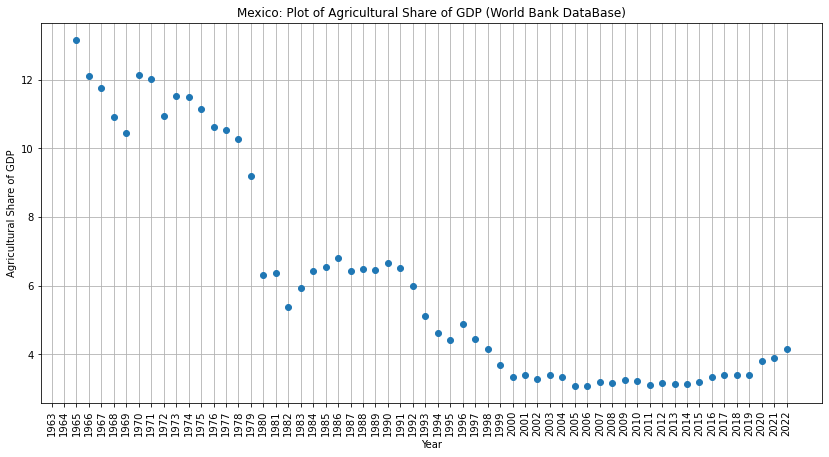

In [107]:
plot_region_base(country,'Agricultural Share of GDP')

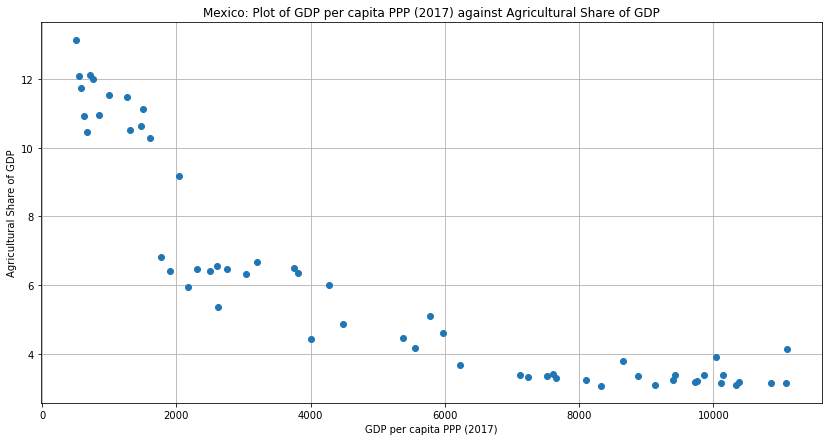

In [106]:
compare_region_bases(country,'GDP per capita PPP (2017)','Agricultural Share of GDP')